In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

## Question 13

In [2]:
Smarket = pd.read_csv('/Users/rj/Downloads/Smarket.csv', sep=',')
Smarket
Smarket.set_index('Unnamed: 0', inplace=True)
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Unnamed: 0,,,,,,,,,
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up


In [3]:
Smarket.isna().any()

Year         False
Lag1         False
Lag2         False
Lag3         False
Lag4         False
Lag5         False
Volume       False
Today        False
Direction    False
dtype: bool

In [4]:
Smarket.shape
Smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [5]:
Smarket['Direction'].value_counts()

Direction
Up      648
Down    602
Name: count, dtype: int64

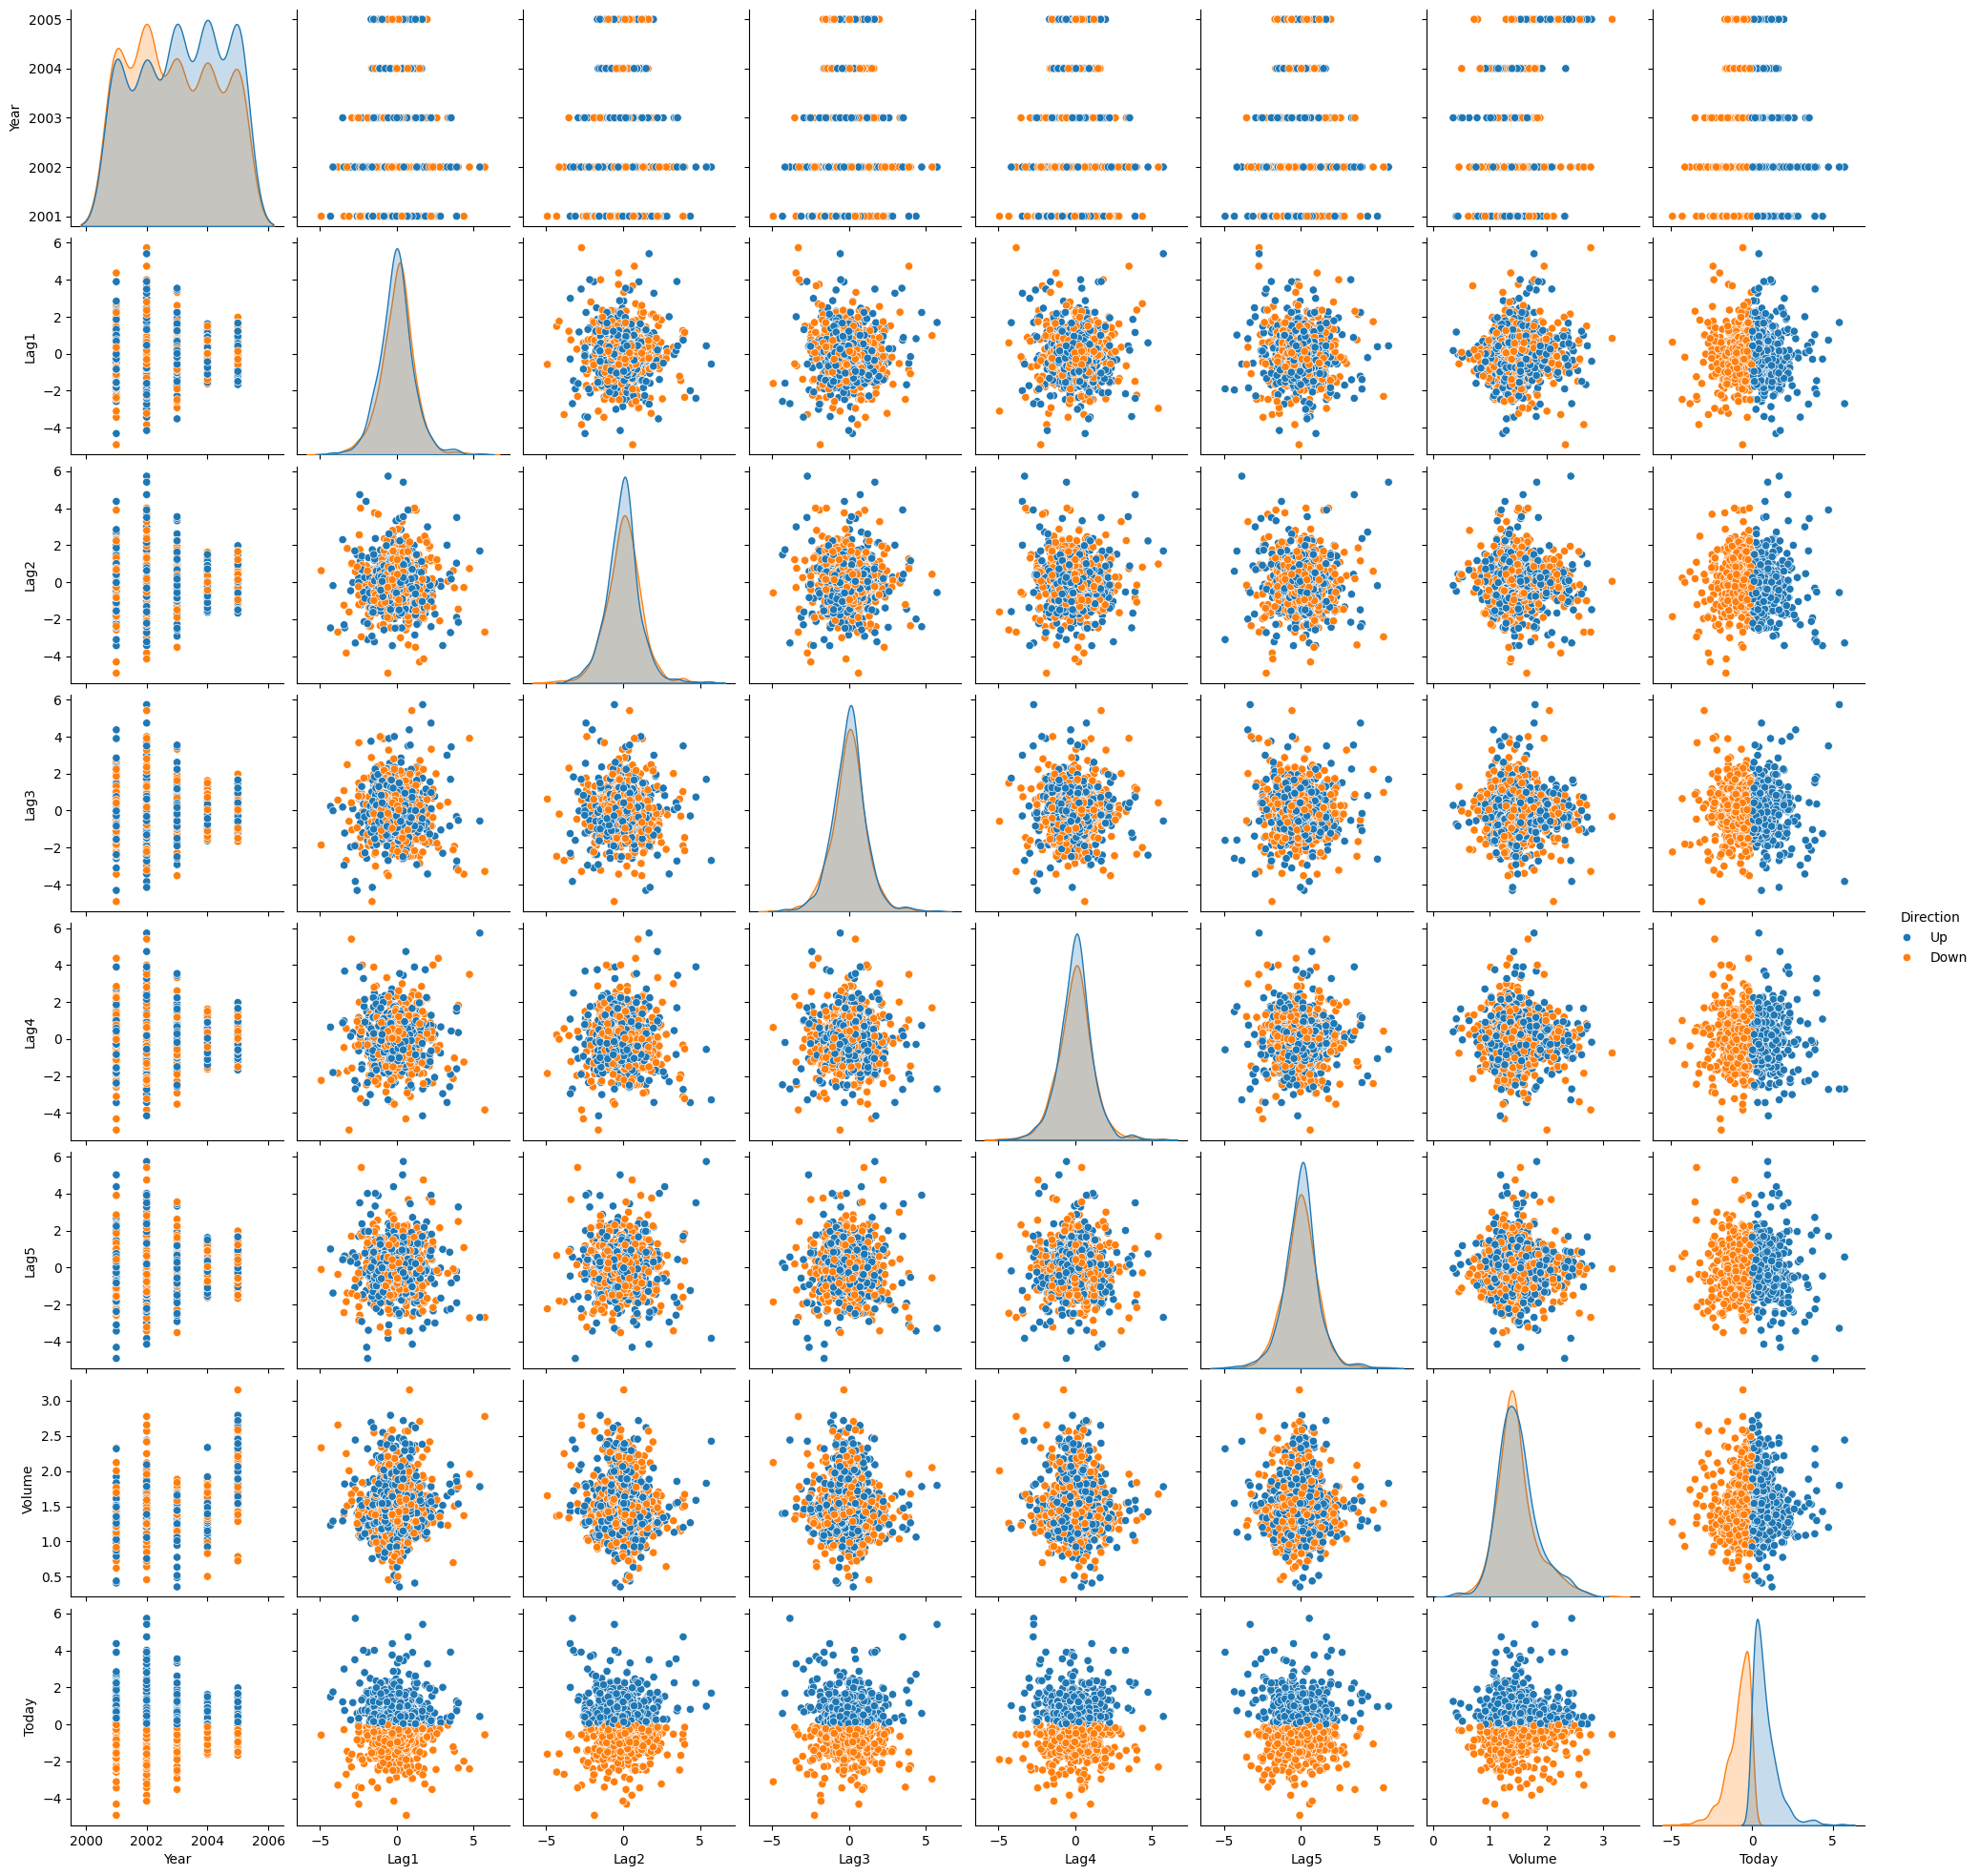

In [6]:
sns.pairplot(Smarket, hue='Direction')

In [7]:
Smarket.corr(numeric_only='True')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [8]:
endog=(Smarket['Direction']=='Up').astype('int64')
exog=sm.add_constant(Smarket.drop(columns=['Direction', 'Year', 'Today']))

In [9]:
endog

Unnamed: 0
1       1
2       1
3       0
4       1
5       1
       ..
1246    1
1247    0
1248    1
1249    0
1250    0
Name: Direction, Length: 1250, dtype: int64

In [10]:
exog

,const,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
Unnamed: 0,,,,,,,
1,1.0,0.381,-0.192,-2.624,-1.055,5.010,1.19130
2,1.0,0.959,0.381,-0.192,-2.624,-1.055,1.29650
3,1.0,1.032,0.959,0.381,-0.192,-2.624,1.41120
4,1.0,-0.623,1.032,0.959,0.381,-0.192,1.27600
5,1.0,0.614,-0.623,1.032,0.959,0.381,1.20570
...,...,...,...,...,...,...,...
1246,1.0,0.422,0.252,-0.024,-0.584,-0.285,1.88850
1247,1.0,0.043,0.422,0.252,-0.024,-0.584,1.28581
1248,1.0,-0.955,0.043,0.422,0.252,-0.024,1.54047


In [11]:
logit_mod=sm.Logit(endog,exog).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                0.002074
Time:                        08:23:32   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [12]:
train_mask = (Smarket['Year'] < 2005)
train_mask

Unnamed: 0
1        True
2        True
3        True
4        True
5        True
        ...  
1246    False
1247    False
1248    False
1249    False
1250    False
Name: Year, Length: 1250, dtype: bool

In [13]:
Smarket_2005 = Smarket[~train_mask]
Smarket_2005.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Unnamed: 0,,,,,,,,,
999,2005,-0.134,0.008,-0.007,0.715,-0.431,0.7869,-0.812,Down
1000,2005,-0.812,-0.134,0.008,-0.007,0.715,1.5108,-1.167,Down
1001,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.7210,-0.363,Down
1002,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.7389,0.351,Up
1003,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.5691,-0.143,Down


In [14]:
train_endog = ((Smarket.loc[train_mask,'Direction']=='Up').astype('int64'))
test_endog = Smarket.loc[~train_mask,'Direction']

In [15]:
train_exog=sm.add_constant(Smarket[train_mask].drop(columns=['Direction', 'Year', 'Today']))
test_exog=sm.add_constant(Smarket[~train_mask].drop(columns=['Direction', 'Year', 'Today']))

In [16]:
logit_res=sm.Logit(train_endog,train_exog).fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                0.001562
Time:                        08:25:59   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
Covariance Type:            nonrobust   LLR p-value:                    0.9044
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.052     -1.046      0.295      -0.156       0.047
Lag2          -0.0458      0.052     -0.884      0.377      -0.147       0.056
Lag3           0.0072      0.052      0.139      0.889      -0.094       0.108
Lag4           0.0064      0.052      0.125      0.901      -0.095       0.108
Lag5          -0.0042      0.051     -0.083      0.934      -0.104       0.096
Volume        -0.1163      0.240     -0.485      0.628      -0.586       0.353
==============================================================================
"""

In [17]:
logit_test_probs=logit_res.predict(test_exog)
logit_test_probs=pd.Series(logit_test_probs).apply(lambda x: 'Up' if (x>0.5) else 'Down')

In [18]:
pd.DataFrame(confusion_matrix(test_endog,logit_test_probs),columns=['PredDown', 'PredUp'], index=['ActualDown', 'ActualUp'])

,PredDown,PredUp
ActualDown,77,34
ActualUp,97,44


## 13e

In [19]:
lda_clf = LinearDiscriminantAnalysis(store_covariance=True)
lda_clf.fit(train_exog,train_endog)

LinearDiscriminantAnalysis(store_covariance=True)

In [20]:
pd.Series(lda_clf.priors_, index=lda_clf.classes_)

0    0.491984
1    0.508016
dtype: float64

In [21]:
pd.DataFrame(lda_clf.means_, index=lda_clf.classes_,columns=train_exog.columns)

,const,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,1.0,0.042790,0.033894,-0.009807,-0.010599,0.004367,1.371843
1,1.0,-0.039546,-0.031325,0.005834,0.003110,-0.000651,1.363210


In [22]:
lda_pred=np.where(lda_clf.predict(test_exog) > 0.5, 'Up', 'Down')

In [23]:
lda_pred_probs=pd.DataFrame(lda_clf.predict_proba(test_exog),columns=lda_clf.classes_)
lda_pred_probs

,0,1
0,0.471826,0.528174
1,0.484352,0.515648
2,0.477387,0.522613
3,0.486156,0.513844
4,0.501626,0.498374
...,...,...
247,0.516285,0.483715
248,0.493935,0.506065
249,0.483364,0.516636
250,0.483894,0.516106


In [24]:
pd.DataFrame(confusion_matrix(test_endog,lda_pred),columns=['PredDown', 'PredUp'], index=['ActualDown', 'ActualUp'])

,PredDown,PredUp
ActualDown,77,34
ActualUp,97,44


## 13f

In [25]:
qda_clf = QuadraticDiscriminantAnalysis(store_covariance=True)
qda_clf.fit(train_exog,train_endog)

/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(store_covariance=True)

In [26]:
pd.Series(qda_clf.priors_, index=qda_clf.classes_)

0    0.491984
1    0.508016
dtype: float64

In [27]:
pd.DataFrame(qda_clf.means_, index=qda_clf.classes_,columns=train_exog.columns)

,const,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,1.0,0.042790,0.033894,-0.009807,-0.010599,0.004367,1.371843
1,1.0,-0.039546,-0.031325,0.005834,0.003110,-0.000651,1.363210


In [28]:
qda_pred=np.where(qda_clf.predict(test_exog) > 0.5, 'Up', 'Down')

/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [29]:
qda_pred_probs=pd.DataFrame(qda_clf.predict_proba(test_exog),columns=qda_clf.classes_)
qda_pred_probs

/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


,0,1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
247,NaN,NaN
248,NaN,NaN
249,NaN,NaN
250,NaN,NaN


In [30]:
pd.DataFrame(confusion_matrix(test_endog,qda_pred),columns=['PredDown', 'PredUp'], index=['ActualDown', 'ActualUp'])

,PredDown,PredUp
ActualDown,111,0
ActualUp,141,0


## 13f

In [63]:
test_endog_reshaped = endog.values.reshape(-1, 1)
test_exog_reshaped = test_exog.values.reshape(-1, 1) 

In [64]:
test_endog_reshaped.shape

(1250, 1)

In [65]:
test_exog_reshaped.shape

(1764, 1)

## 13g

In [67]:
X_train = Smarket.loc[train_mask, "Lag2"].to_frame()
y_train = Smarket.loc[train_mask, "Direction"]
X_test = Smarket.loc[~train_mask, "Lag2"].to_frame()
y_test = Smarket.loc[~train_mask, "Direction"]

In [68]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,25)}
knn_gsvc = GridSearchCV(knn, param_grid, cv=5)
knn_gsvc.fit(X_train,y_train)
knn_gsvc.best_params_

{'n_neighbors': 1}

In [69]:
knn_gsvc.score(X_test,y_test)

0.5158730158730159

Logistic Regression and LDA came out as the best models to use.

## Question 14

In [70]:
auto = pd.read_csv('/Users/rj/Downloads/Auto.csv', sep=',')

print(auto)

      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle ma

In [83]:
auto.replace('?', np.nan, inplace=True)

In [84]:
auto.dropna(inplace=True)

In [85]:
auto["origin"] = auto["origin"].map({1: "American", 2: "European", 3: "Japanese"})
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_med
0,18.0,8,307.0,130,3504,12.0,70,NaN,chevrolet chevelle malibu,Below
1,15.0,8,350.0,165,3693,11.5,70,NaN,buick skylark 320,Below
2,18.0,8,318.0,150,3436,11.0,70,NaN,plymouth satellite,Below
3,16.0,8,304.0,150,3433,12.0,70,NaN,amc rebel sst,Below
4,17.0,8,302.0,140,3449,10.5,70,NaN,ford torino,Below


In [86]:
mpg_med = (auto["mpg"] > auto["mpg"].median()).map({False: "Below", True: "Above"})
auto["mpg_med"] = mpg_med
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_med
0,18.0,8,307.0,130,3504,12.0,70,NaN,chevrolet chevelle malibu,Below
1,15.0,8,350.0,165,3693,11.5,70,NaN,buick skylark 320,Below
2,18.0,8,318.0,150,3436,11.0,70,NaN,plymouth satellite,Below
3,16.0,8,304.0,150,3433,12.0,70,NaN,amc rebel sst,Below
4,17.0,8,302.0,140,3449,10.5,70,NaN,ford torino,Below


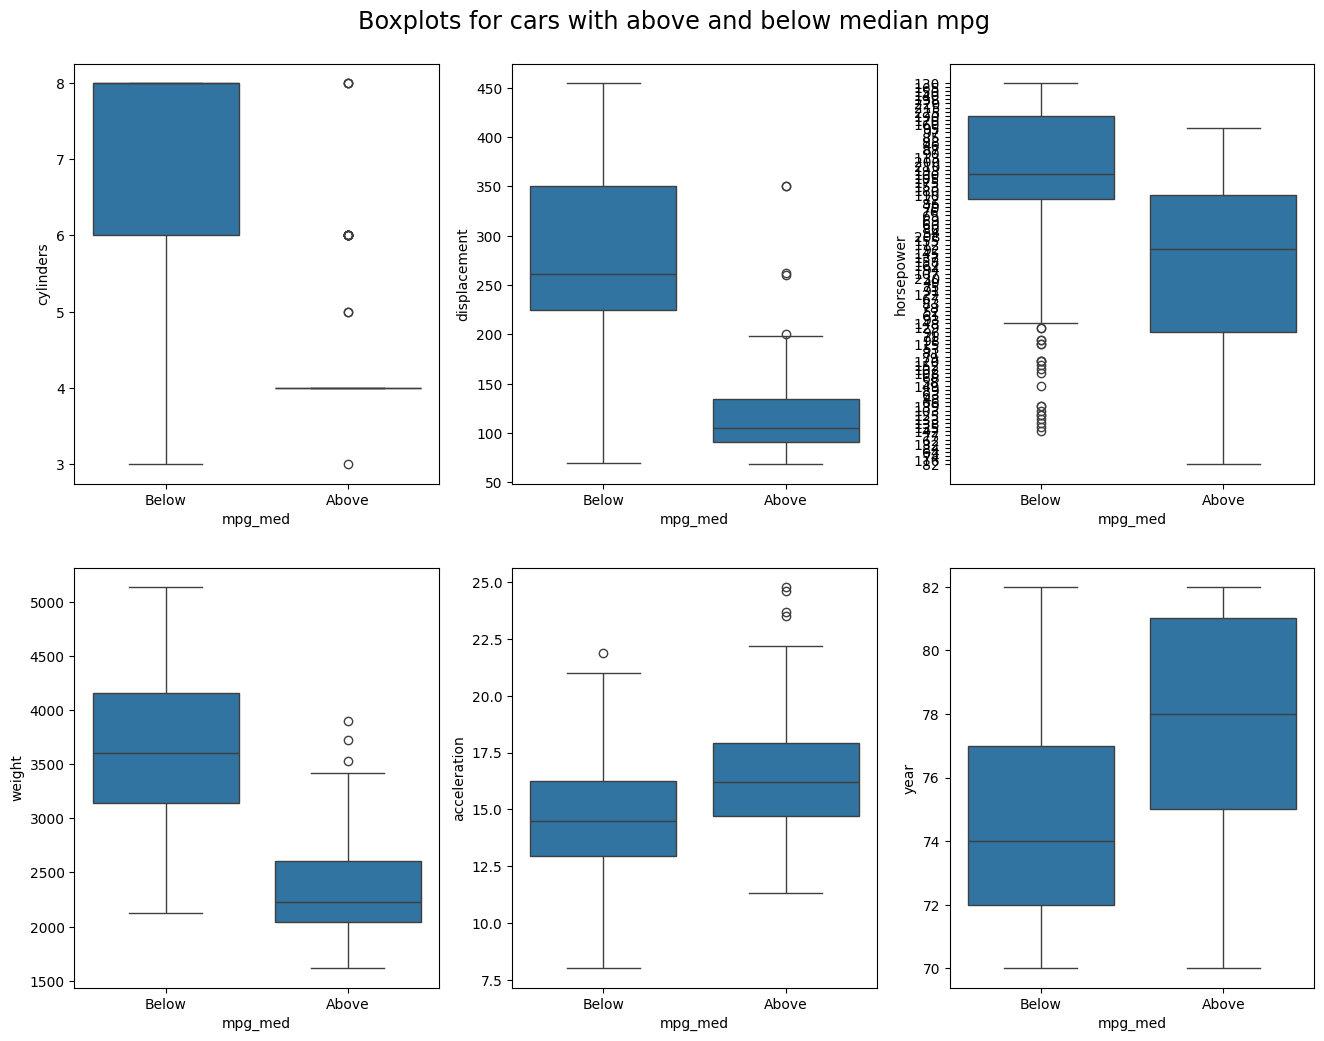

In [87]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 12))
sns.boxplot(x = "mpg_med", y = "cylinders", data = auto, ax = axes[0, 0])
sns.boxplot(x = "mpg_med", y = "displacement", data = auto, ax = axes[0, 1])
sns.boxplot(x = "mpg_med", y = "horsepower", data = auto, ax = axes[0, 2])
sns.boxplot(x = "mpg_med", y = "weight", data = auto, ax = axes[1, 0])
sns.boxplot(x = "mpg_med", y = "acceleration", data = auto, ax = axes[1, 1])
sns.boxplot(x = "mpg_med", y = "year", data = auto, ax = axes[1, 2])
fig.suptitle("Boxplots for cars with above and below median mpg", size = "xx-large", y = 0.925);

When looking at the boxplots we can see that the 4 cylinders have the best mpg. The lower the displacement the better the mpg. lower horsepower the better mpg. the higher the accelleration the better the mpg, and the newer the car the better the mpg.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(auto, auto["mpg_med"], test_size = 0.25, random_state = 312)

In [89]:
categorical_features = ["origin"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight", "year"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), ("classifier", LinearDiscriminantAnalysis())])

In [90]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)

In [91]:
mat

array([[51,  1],
       [10, 36]])

In [92]:
clf.score(X_test, y_test)

0.8877551020408163

We had an overall error score of 11% when doing an LDA test.

In [93]:
categorical_features = ["origin"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight", "year"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), ("classifier", QuadraticDiscriminantAnalysis())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
mat

array([[50,  2],
       [ 8, 38]])

In [94]:
clf.score(X_test, y_test)

0.8979591836734694

We can see we got a better score with Qda then we did with LDA. There is less error in QDA so it is a better model to use.

In [97]:
categorical_features = ["origin"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight", "year"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), ("classifier", LogisticRegression())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
mat

array([[47,  5],
       [ 8, 38]])

In [98]:
clf.score(X_test, y_test)

0.8673469387755102

Logistic Regression has the worst score of the three which means it has the most error.

In [103]:
auto1 = auto['mpg_med']

In [104]:
X = pd.get_dummies(auto)
X.head()

,mpg,cylinders,displacement,weight,acceleration,year,horsepower_100,horsepower_102,horsepower_103,horsepower_105,...,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom,mpg_med_Above,mpg_med_Below
0,18.0,8,307.0,3504,12.0,70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,15.0,8,350.0,3693,11.5,70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,18.0,8,318.0,3436,11.0,70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,16.0,8,304.0,3433,12.0,70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,17.0,8,302.0,3449,10.5,70,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, auto1, test_size = 0.25, random_state = 312)

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
print(X_test_scaled.shape)
print(X_train_scaled.shape)

(98, 402)
(294, 402)


In [110]:
print(y_train.shape)

(294,)


In [111]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,25)}
knn_gsvc = GridSearchCV(knn, param_grid, cv=5)
knn_gsvc.fit(X_train_scaled,y_train)
knn_gsvc.best_params_

{'n_neighbors': 24}

In [112]:
knn_gsvc.score(X_test,y_test)

/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.46938775510204084

The KNN performed the worst of the three models with an error score of 54%.

## Question 16

In [120]:
boston = pd.read_csv('/Users/rj/Downloads/Boston.csv', sep=',')
boston1 = boston.drop(columns = 'Unnamed: 0')
boston1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [126]:
crim_med = (boston1["crim"] > boston1["crim"].median()).map({False: 0, True: 1})
boston1["crim_med"] = crim_med
boston1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim_med
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [127]:
boston1.corr()["crim_med"]

crim        0.409395
zn         -0.436151
indus       0.603260
chas        0.070097
nox         0.723235
rm         -0.156372
age         0.613940
dis        -0.616342
rad         0.619786
tax         0.608741
ptratio     0.253568
black      -0.351211
lstat       0.453263
medv       -0.263017
crim_med    1.000000
Name: crim_med, dtype: float64

In [128]:
X_train, X_test, y_train, y_test = train_test_split(boston1, boston1["crim_med"], test_size = 0.25, random_state = 312)

In [129]:
not_chas = boston1.columns.drop(["chas", "crim", "crim_med"])
moderate_corr = boston1.corr().loc[(boston1.corr()["crim"].abs() > 0.3), "crim"].index.drop("crim")

In [130]:
clf = LogisticRegression(penalty = "none", solver = "lbfgs", max_iter = 10000)
clf.fit(X_train[not_chas], y_train)

/Users/rj/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=10000, penalty='none')

In [131]:
clf.score(X_test[not_chas], y_test)

0.9212598425196851

In [132]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train[not_chas], y_train)

LinearDiscriminantAnalysis()

In [133]:
clf.score(X_test[not_chas], y_test)

0.84251968503937

In [134]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train[not_chas], y_train)

QuadraticDiscriminantAnalysis()

In [135]:
clf.score(X_test[not_chas], y_test)

0.905511811023622

In [138]:
y_train.shape

(379,)

In [142]:
X_train[not_chas].shape

(379, 12)

In [143]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,25)}
knn_gsvc = GridSearchCV(knn, param_grid, cv=5)
knn_gsvc.fit(X_train[not_chas],y_train)
knn_gsvc.best_params_

{'n_neighbors': 1}

In [145]:
knn_gsvc.score(X_test[not_chas],y_test)

0.937007874015748

When looking at our scores we can see that the KNN has the best performance score with 93%. Then Logististic Regression comes in at a clsoe second with a score of 92% and QDA in third with a score of 90%. LDA came in last with a score of 84%.